In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
data = pd.read_csv(r"C:\Users\SWATTIK MAITI\Desktop\student-mat.csv", sep = ";")
data


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
data = data[["G1","G2","G3","absences","studytime","failures"]] #TRIMMING THE DATASET TO KEEP ONLY THE VARIABLES(ATTRIBUTES) REQUIRED
data.head()#print the first 5 rows only

,G1,G2,G3,absences,studytime,failures
0,5,6,6,6,2,0
1,5,5,6,4,2,0
2,7,8,10,10,2,3
3,15,14,15,2,3,0
4,6,10,10,4,2,0


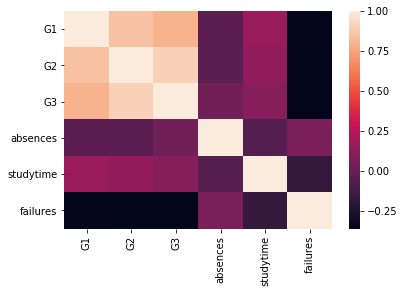

In [5]:
sns.heatmap(data.corr())
plt.show()

In [6]:
data.corr()

,G1,G2,G3,absences,studytime,failures
G1,1.000000,0.852118,0.801468,-0.031003,0.160612,-0.354718
G2,0.852118,1.000000,0.904868,-0.031777,0.135880,-0.355896
G3,0.801468,0.904868,1.000000,0.034247,0.097820,-0.360415
absences,-0.031003,-0.031777,0.034247,1.000000,-0.062700,0.063726
studytime,0.160612,0.135880,0.097820,-0.062700,1.000000,-0.173563
failures,-0.354718,-0.355896,-0.360415,0.063726,-0.173563,1.000000


In [8]:
DATA=data.drop("G3",1) #removing G3 from dataset as it is what we are asked to predict
DATA.head()

,G1,G2,absences,studytime,failures
0,5,6,6,2,0
1,5,5,4,2,0
2,7,8,10,2,3
3,15,14,2,3,0
4,6,10,4,2,0


In [9]:
predict = "G3"
x = np.array(data.drop([predict],1)) #drops G3 and coverts rest of data set into array form(in multiple arrays according to rows)
y = np.array(data[predict]) #makes a separate dataset with only G3 values and converts in array form (in a single array)
x_train , x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size= 0.1)

In [10]:
best = 0
for _ in range(30):
    x_train , x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size= 0.1)
    #splitting the data set in 4 groups 
    #x contains G1,G2,absences,studytime,failures and y contains G3
    #test_size 0.1 means 10% of the dataset of both x and y is separated in x_test and y_test for testing the accuracy of the algo
    #rest of the 90% of the data sets are used up in x_train and y_train to train the algo

    LRM = linear_model.LinearRegression()
    model=LRM.fit(x_train,y_train)
    accuracy = model.score(x_test,y_test)
    print(accuracy)
    if(accuracy > best):
        best = accuracy
        with open("studentmodel.pickle","wb") as f:
            pickle.dump(model,f)
    


0.8497433858705228
0.5457639382301354
0.8545378243212246
0.7286336822074413
0.6540601898105134
0.7688271506778033
0.7393160922965423
0.7704251343088119
0.689346996518811
0.8784433089742656
0.8644596428780883
0.92136055275547
0.7461898472407649
0.8397297644790863
0.7553300333693025
0.8214002256695582
0.9001618784277853
0.6977543248803956
0.8426321734815353
0.9220822491068194
0.8982994480385452
0.961549972274937
0.7649086784101025
0.8894969082807757
0.8499235788668533
0.914303504488757
0.7846728204921445
0.8626755346712693
0.8179494950617858
0.6155738835188618


In [3]:
pickle_in = open("studentmodel.pickle","rb")   
model = pickle.load(pickle_in)


In [50]:
predictions = model.predict(x_test)


In [51]:
#we print all predictions along with the attributes used for the prediction
#we also print the actual G3 corresponding to those attributes and see if our pedictions are correct
for i in range(0,len(predictions)):
    print(predictions[i],"\t",x_test[i],"\t",y_test[i],"\n")

13.960046359779884 	 [14 14  0  2  0] 	 14 

10.460177716167564 	 [10 11 10  4  0] 	 11 

12.63108576944156 	 [11 13  2  2  0] 	 13 

8.550255421472166 	 [10  9  7  3  0] 	 9 

9.649302973505161 	 [10 10 14  2  1] 	 9 

14.90501446134406 	 [15 15  0  3  0] 	 15 

15.75370633147929 	 [14 16  0  3  0] 	 16 

14.62612599357718 	 [13 15  0  3  0] 	 15 

16.354651269467542 	 [17 16  0  2  0] 	 16 

7.86064396616452 	 [7 9 0 3 0] 	 8 

9.317025181487567 	 [10 10  6  4  0] 	 11 

10.65481356140422 	 [11 11  2  2  0] 	 11 

7.888589682464037 	 [10  8  6  1  0] 	 11 

15.475167774335318 	 [15 15 10  2  0] 	 15 

16.153271017031326 	 [15 16  2  2  0] 	 16 

19.87364069773692 	 [18 19  6  1  0] 	 19 

3.425675774225466 	 [6 5 0 3 1] 	 0 

18.48152601337705 	 [18 18  5  3  0] 	 19 

3.565120008108906 	 [7 5 0 3 1] 	 0 

11.952982526745547 	 [11 12 10  2  0] 	 13 

4.609841255698679 	 [8 6 2 2 2] 	 5 

12.75530771717002 	 [16 12  8  1  0] 	 13 

4.33345775421599 	 [ 6  5 14  1  1] 	 5 

10.29841687